<a href="https://colab.research.google.com/github/siva4iov/Tabular-Playground-Series---Aug-2022/blob/main/Tabular_Playground_Series_Aug_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Playground Series - Aug 2022
From this [Kaggle competition](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022)


In [2]:
# !pip install kaggle

# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"puzablo","key":"43a081771d1e6970ac190f81e45e448c"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c tabular-playground-series-aug-2022

# !unzip /content/tabular-playground-series-aug-2022.zip

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("/content/train.csv")
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [6]:
df = df.drop(["id"], axis=1)
df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [7]:
submissions = pd.read_csv("/content/sample_submission.csv")
submissions.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [9]:
df.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [10]:
df.describe(include=["O"])

,product_code,attribute_0,attribute_1
count,26570,26570,26570
unique,5,2,3
top,C,material_7,material_8
freq,5765,21320,10865


# Feature Engineering

In [11]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [12]:
target = train.pop("failure")
target

0        0
1        0
2        0
3        0
4        0
        ..
26565    0
26566    0
26567    0
26568    0
26569    0
Name: failure, Length: 26570, dtype: int64

In [13]:
train.drop(["id"],axis=1, inplace=True)
test.drop(["id"], axis=1,inplace=True)

In [14]:
cat_columns = [col for col in train.columns if train[col].nunique() <= 10]
cat_columns.remove("product_code")
numeric_columns = [col for col in train.columns if train[col].nunique() > 10]
cols_with_miss = [col for col in train.columns if train[col].isna().sum() > 0]
cols_with_miss_t = [col for col in test.columns if test[col].isna().sum() > 0]

In [15]:
#idea from kaggle disscussions to add count of missing values as extra column
#https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/discussion/342319

train['m_3_missing'] = train.measurement_3.isna()
train['m_5_missing'] = train.measurement_5.isna()

test['m_3_missing'] = test.measurement_3.isna()
test['m_5_missing'] = test.measurement_5.isna()

#Missing Value Imputation

In [16]:
from sklearn.impute import SimpleImputer, KNNImputer

In [17]:
def impute_missing(df, cols_with_miss):
  print(df[cols_with_miss].shape)
  groups = []
  for pr_name in df.product_code.unique():
    groups.append(
    KNNImputer(n_neighbors=3).fit_transform(df[df.product_code == pr_name][cols_with_miss])
    )
  new_df = pd.DataFrame(np.concatenate(groups, axis=0), columns=cols_with_miss)
  print(new_df.shape)
  return new_df

In [18]:
train[cols_with_miss] = impute_missing(train, cols_with_miss)
test[cols_with_miss_t] = impute_missing(test, cols_with_miss_t)

(26570, 16)
(26570, 16)
(20775, 16)
(20775, 16)


#Feature Engineering

The main idea here is to create an additional column with the multiplication of `attribute_2` and `attribute_3`, because it looks like these attributes are measures of size, and in this way we can get the area, and aggregate measure columns to reduce the dimensionality of the data.

In [19]:
train["attribute_2*3"] = train["attribute_2"]*train["attribute_3"]
test["attribute_2*3"] = test["attribute_2"]*test["attribute_3"]

In [20]:
measure_cols = [col for col in train.columns if "measure" in col]
measure_cols

['measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

Measures from 3 to 16 look the same(maybe same type of measures). So we could aggregate them

In [21]:
measure_cols = measure_cols[3:17]
measure_cols

['measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16']

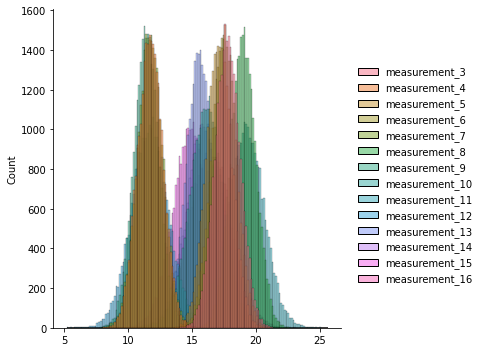

In [22]:
sns.color_palette("bright")
g = sns.displot(train[measure_cols])

We can see there are 2 groups of distributions. We can separate them by mean values

In [23]:
train[measure_cols].describe()

,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16
count,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000
mean,17.790573,11.733155,17.128347,17.510030,11.719278,19.023150,11.428558,16.122899,19.170860,11.699108,15.645902,16.037052,15.000448,16.463307
std,0.996171,0.989129,0.987806,0.985664,0.988950,0.994949,0.985390,1.385932,1.493857,1.458847,1.130390,1.461891,1.511614,1.662490
min,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000
25%,17.122000,11.065000,16.456000,16.852000,11.064000,18.356000,10.768000,15.235000,18.202000,10.731000,14.909167,15.077000,14.000000,15.325000
50%,17.783000,11.735000,17.133000,17.514500,11.717000,19.019000,11.428000,16.133000,19.201000,11.709000,15.616000,16.023000,14.977000,16.444667
75%,18.461000,12.403000,17.794750,18.166000,12.380000,19.692000,12.085750,17.010000,20.176000,12.673000,16.338750,17.038500,15.979750,17.575000
max,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000


In [24]:
measure_cols = np.array(measure_cols)
mask = np.mean(train[measure_cols]) < 13
g1_meas = measure_cols[mask]
g2_meas = measure_cols[~mask]

I would try 2 different approaches to reduce dimensionality.


*   Create statistics metrics of measures to describe distribution
*   Use PCA



In [25]:
# #1st approach
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# train_pca = pca.fit_transform(train[measure_cols])
# sns.pairplot(pd.concat([pd.DataFrame(train_pca), target], axis=1), hue="failure")

Doesn't look very good

In [26]:
#2nd approach
train["g1_meas_mean"] = np.mean(train[g1_meas], axis=1)
test["g1_meas_mean"] = np.mean(test[g1_meas], axis=1)

train["g2_meas_mean"] = np.mean(train[g2_meas], axis=1)
test["g2_meas_mean"] = np.mean(test[g2_meas], axis=1)

train["g1_meas_std"] = np.std(train[g1_meas], axis=1)
test["g1_meas_std"] = np.std(test[g1_meas], axis=1)

train["g2_meas_std"] = np.std(train[g2_meas], axis=1)
test["g2_meas_std"] = np.std(test[g2_meas], axis=1)

In [27]:
cols_to_use = ["loading", "attribute_0", "attribute_1", "measurement_0",
               "measurement_1",	"measurement_2", "measurement_17", "m_3_missing",
               "m_5_missing",	"attribute_2*3", "g1_meas_mean", "g2_meas_mean",
               "g1_meas_std", "g2_meas_std"]

In [28]:
train = train[cols_to_use]
test = test[cols_to_use]

# Encoding values

In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [30]:
pd.concat([train, test], axis=0).nunique()

loading           15030
attribute_0           2
attribute_1           4
measurement_0        31
measurement_1        33
measurement_2        28
measurement_17    45159
m_3_missing           2
m_5_missing           2
attribute_2*3         7
g1_meas_mean      20472
g2_meas_mean      32105
g1_meas_std       47333
g2_meas_std       47344
dtype: int64

In [31]:
cols = ["attribute_0", "attribute_1"]
df_comb = pd.concat([train, test], axis=0)
for col in cols:
  oh = OneHotEncoder(handle_unknown="ignore")
  transformed = oh.fit_transform(df_comb[col].array.reshape(-1,1))
  df_comb = pd.concat([df_comb.drop(col, axis=1).reset_index(drop=True), \
                       pd.DataFrame(transformed.toarray(),\
                                    columns=[col + cat for cat in oh.categories_]).reset_index(drop=True)], axis=1)
new_train = df_comb[:train.shape[0]]
new_test = df_comb[train.shape[0]:]

In [32]:
train = new_train
test = new_test

In [33]:
cols = ["m_3_missing", "m_5_missing"]
train[cols] = train[cols].astype(np.int32)
test[cols] = test[cols].astype(np.int32)

In [34]:
test

,loading,measurement_0,measurement_1,measurement_2,measurement_17,m_3_missing,m_5_missing,attribute_2*3,g1_meas_mean,g2_meas_mean,g1_meas_std,g2_meas_std,"(attribute_0material_5,)","(attribute_0material_7,)","(attribute_1material_5,)","(attribute_1material_6,)","(attribute_1material_7,)","(attribute_1material_8,)"
26570,119.57,6,9,6,634.612,0,0,24,11.58750,16.957600,1.357926,1.852752,1.0,0.0,0.0,1.0,0.0,0.0
26571,113.51,11,8,0,537.037,0,0,24,11.90275,16.616733,0.465374,1.764562,1.0,0.0,0.0,1.0,0.0,0.0
26572,112.16,8,12,4,658.995,0,0,24,11.31425,16.837500,0.652480,1.450401,1.0,0.0,0.0,1.0,0.0,0.0
26573,112.72,8,11,10,594.301,0,0,24,11.22875,16.357800,0.362023,1.772217,1.0,0.0,0.0,1.0,0.0,0.0
26574,208.00,14,16,8,801.044,0,0,24,12.60875,16.559500,0.544538,1.637601,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,0,4,9,696.466,0,0,45,11.75675,17.199467,0.502284,1.466291,0.0,1.0,1.0,0.0,0.0,0.0
47341,74.53,4,8,7,613.249,0,0,45,11.54675,16.458100,1.337496,1.467336,0.0,1.0,1.0,0.0,0.0,0.0
47342,67.73,10,11,2,783.349,0,0,45,11.23375,17.513400,0.584532,1.846700,0.0,1.0,1.0,0.0,0.0,0.0
47343,126.15,8,16,11,745.210,0,0,45,11.47725,17.125900,1.380599,1.482351,0.0,1.0,1.0,0.0,0.0,0.0


#XGBoost Model

In [35]:
# !pip install xgboost

In [46]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [37]:
X_toy, _, y_toy, _ = train_test_split(train, target, train_size=0.05, shuffle=True, stratify=target, random_state=42)

In [38]:
X_toy.shape

(1328, 18)

In [39]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

model = XGBClassifier(random_state=42)

gs = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    verbose=3
)

In [40]:
gs.fit(X_toy, y_toy)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=XGBClassifier(random_state=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=3)

In [41]:
gs.cv_results_
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [42]:
model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.85, shuffle=True, stratify=target, random_state=42)

In [44]:
history = model.fit(X_train, y_train, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-auc:0.5731
[1]	validation_0-auc:0.5731
[2]	validation_0-auc:0.572882
[3]	validation_0-auc:0.572882
[4]	validation_0-auc:0.572876
[5]	validation_0-auc:0.572876
[6]	validation_0-auc:0.572876
[7]	validation_0-auc:0.575785
[8]	validation_0-auc:0.575801
[9]	validation_0-auc:0.576314
[10]	validation_0-auc:0.576814
[11]	validation_0-auc:0.576699
[12]	validation_0-auc:0.576742
[13]	validation_0-auc:0.576712
[14]	validation_0-auc:0.576597
[15]	validation_0-auc:0.576585
[16]	validation_0-auc:0.576674
[17]	validation_0-auc:0.576756
[18]	validation_0-auc:0.576571
[19]	validation_0-auc:0.576624
[20]	validation_0-auc:0.576622
[21]	validation_0-auc:0.576734
[22]	validation_0-auc:0.576761
[23]	validation_0-auc:0.576619
[24]	validation_0-auc:0.576592
[25]	validation_0-auc:0.576726
[26]	validation_0-auc:0.576753
[27]	validation_0-auc:0.576733
[28]	validation_0-auc:0.576733
[29]	validation_0-auc:0.576784
[30]	validation_0-auc:0.576744
[31]	validation_0-auc:0.576729
[32]	validation_0-auc:

In [47]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.5778904839259903

#XGBoost Submissions

In [48]:
pred = model.predict_proba(test)

In [49]:
results = pd.concat([test.reset_index()["index"], pd.DataFrame(pred[:, 1])], axis=1).rename(columns={"index": "id", 0: "failure"})

In [50]:
results.to_csv("submissions.csv", index=False)

# Feature Scaling

In [51]:
display(train)
display(test)

,loading,measurement_0,measurement_1,measurement_2,measurement_17,m_3_missing,m_5_missing,attribute_2*3,g1_meas_mean,g2_meas_mean,g1_meas_std,g2_meas_std,"(attribute_0material_5,)","(attribute_0material_7,)","(attribute_1material_5,)","(attribute_1material_6,)","(attribute_1material_7,)","(attribute_1material_8,)"
0,80.10,7,8,4,764.100,0,0,45,12.530500,16.3514,1.671044,2.209398,0.0,1.0,0.0,0.0,0.0,1.0
1,84.89,14,3,3,682.057,0,0,45,12.122750,16.7757,0.492839,1.452198,0.0,1.0,0.0,0.0,0.0,1.0
2,82.43,12,1,5,663.376,0,0,45,12.720750,17.2402,0.758738,1.379038,0.0,1.0,0.0,0.0,0.0,1.0
3,101.07,13,2,6,826.282,0,0,45,11.565500,17.2131,1.047176,1.278777,0.0,1.0,0.0,0.0,0.0,1.0
4,188.06,9,2,8,579.885,0,0,45,11.755250,16.5696,1.011593,2.209384,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,6,16,4,729.131,0,0,54,11.379583,16.6303,1.163317,1.927471,0.0,1.0,0.0,1.0,0.0,0.0
26566,146.02,10,12,8,853.924,0,0,54,11.147333,16.7300,0.617887,2.467562,0.0,1.0,0.0,1.0,0.0,0.0
26567,115.62,1,10,1,750.364,0,0,54,10.810000,16.5348,1.239213,1.476536,0.0,1.0,0.0,1.0,0.0,0.0
26568,106.38,2,9,4,730.156,0,0,54,12.375167,16.5561,1.478648,1.947207,0.0,1.0,0.0,1.0,0.0,0.0


,loading,measurement_0,measurement_1,measurement_2,measurement_17,m_3_missing,m_5_missing,attribute_2*3,g1_meas_mean,g2_meas_mean,g1_meas_std,g2_meas_std,"(attribute_0material_5,)","(attribute_0material_7,)","(attribute_1material_5,)","(attribute_1material_6,)","(attribute_1material_7,)","(attribute_1material_8,)"
26570,119.57,6,9,6,634.612,0,0,24,11.58750,16.957600,1.357926,1.852752,1.0,0.0,0.0,1.0,0.0,0.0
26571,113.51,11,8,0,537.037,0,0,24,11.90275,16.616733,0.465374,1.764562,1.0,0.0,0.0,1.0,0.0,0.0
26572,112.16,8,12,4,658.995,0,0,24,11.31425,16.837500,0.652480,1.450401,1.0,0.0,0.0,1.0,0.0,0.0
26573,112.72,8,11,10,594.301,0,0,24,11.22875,16.357800,0.362023,1.772217,1.0,0.0,0.0,1.0,0.0,0.0
26574,208.00,14,16,8,801.044,0,0,24,12.60875,16.559500,0.544538,1.637601,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,0,4,9,696.466,0,0,45,11.75675,17.199467,0.502284,1.466291,0.0,1.0,1.0,0.0,0.0,0.0
47341,74.53,4,8,7,613.249,0,0,45,11.54675,16.458100,1.337496,1.467336,0.0,1.0,1.0,0.0,0.0,0.0
47342,67.73,10,11,2,783.349,0,0,45,11.23375,17.513400,0.584532,1.846700,0.0,1.0,1.0,0.0,0.0,0.0
47343,126.15,8,16,11,745.210,0,0,45,11.47725,17.125900,1.380599,1.482351,0.0,1.0,1.0,0.0,0.0,0.0


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [53]:
cols = ["loading",	"measurement_0",	"measurement_1",	"measurement_2",
        "measurement_17", "attribute_2*3",	"g1_meas_mean", "g2_meas_mean",
               "g1_meas_std", "g2_meas_std"]
ct = make_column_transformer(
    [StandardScaler(), cols]
)
train[cols]=ct.fit_transform(train)
test[cols]=ct.transform(test)
display(train)
display(test)

,loading,measurement_0,measurement_1,measurement_2,measurement_17,m_3_missing,m_5_missing,attribute_2*3,g1_meas_mean,g2_meas_mean,g1_meas_std,g2_meas_std,"(attribute_0material_5,)","(attribute_0material_7,)","(attribute_1material_5,)","(attribute_1material_6,)","(attribute_1material_7,)","(attribute_1material_8,)"
0,-1.226366,-0.101025,-0.055370,-0.681939,0.524087,0,0,-0.273292,1.570949,-1.578878,1.961569,1.181337,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.103251,1.599402,-1.246039,-0.984141,-0.161081,0,0,-0.273292,0.847547,-0.528614,-1.028636,-0.811047,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.166479,1.113565,-1.722306,-0.379737,-0.317092,0,0,-0.273292,1.908477,0.621157,-0.353802,-1.003549,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.687385,1.356484,-1.484172,-0.077535,1.043389,0,0,-0.273292,-0.141087,0.554076,0.378234,-1.267363,0.0,1.0,0.0,0.0,0.0,1.0
4,1.548471,0.384811,-1.484172,0.526868,-1.014353,0,0,-0.273292,0.195554,-1.038770,0.287925,1.181300,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0.800272,-0.343944,1.849699,-0.681939,0.232049,0,0,0.621896,-0.470927,-0.888520,0.672992,0.439516,0.0,1.0,0.0,1.0,0.0,0.0
26566,0.467940,0.627729,0.897164,0.526868,1.274236,0,0,0.621896,-0.882969,-0.641734,-0.711273,1.860633,0.0,1.0,0.0,1.0,0.0,0.0
26567,-0.313415,-1.558534,0.420897,-1.588544,0.409373,0,0,0.621896,-1.481442,-1.124910,0.865611,-0.747009,0.0,1.0,0.0,1.0,0.0,0.0
26568,-0.550905,-1.315616,0.182763,-0.681939,0.240609,0,0,0.621896,1.295367,-1.072187,1.473280,0.491446,0.0,1.0,0.0,1.0,0.0,0.0


,loading,measurement_0,measurement_1,measurement_2,measurement_17,m_3_missing,m_5_missing,attribute_2*3,g1_meas_mean,g2_meas_mean,g1_meas_std,g2_meas_std,"(attribute_0material_5,)","(attribute_0material_7,)","(attribute_1material_5,)","(attribute_1material_6,)","(attribute_1material_7,)","(attribute_1material_8,)"
26570,-0.211890,-0.343944,0.182763,-0.077535,-0.557310,0,0,-2.362063,-0.102056,-0.078359,1.166896,0.242911,1.0,0.0,0.0,1.0,0.0,0.0
26571,-0.367647,0.870647,-0.055370,-1.890746,-1.372191,0,0,-2.362063,0.457239,-0.922102,-1.098340,0.010862,1.0,0.0,0.0,1.0,0.0,0.0
26572,-0.402345,0.141893,0.897164,-0.681939,-0.353679,0,0,-2.362063,-0.586837,-0.375641,-0.623478,-0.815775,1.0,0.0,0.0,1.0,0.0,0.0
26573,-0.387952,0.141893,0.659031,1.131272,-0.893960,0,0,-2.362063,-0.738525,-1.563036,-1.360639,0.031004,1.0,0.0,0.0,1.0,0.0,0.0
26574,2.060978,1.599402,1.849699,0.526868,0.832618,0,0,-2.362063,1.709774,-1.063771,-0.897429,-0.323205,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,0.435041,-1.801453,-1.007905,0.829070,-0.040747,0,0,-0.273292,0.198216,0.520330,-1.004665,-0.773966,0.0,1.0,1.0,0.0,0.0,0.0
47341,-1.369528,-0.829780,-0.055370,0.224667,-0.735719,0,0,-0.273292,-0.174352,-1.314765,1.115045,-0.771216,0.0,1.0,1.0,0.0,0.0,0.0
47342,-1.544305,0.627729,0.659031,-1.286342,0.684841,0,0,-0.273292,-0.729654,1.297405,-0.795925,0.226988,0.0,1.0,1.0,0.0,0.0,0.0
47343,-0.042768,0.141893,1.849699,1.433474,0.366330,0,0,-0.273292,-0.297654,0.338231,1.224439,-0.731706,0.0,1.0,1.0,0.0,0.0,0.0


In [54]:
X_toy, _, y_toy, _ = train_test_split(train, target, train_size=0.05, shuffle=True, stratify=target, random_state=42)

In [91]:
X_toy, y_toy = train, target # for fitting gridsearch

# Logistic Regression model (best score)

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
param_grid = [
    {"solver": ["sag", "newton-cg"], "penalty": ["l2", "none"], "C": 0.1**np.arange(3, -1, -1)},
    {"solver" :["saga"], "penalty": ["l1", "l2", "none"], "C": 0.1**np.arange(3, -1, -1)},
    {"solver" :["saga"], "penalty": ["elasticnet"], "C": 0.1**np.arange(3, -1, -1), "l1_ratio": 0.1**np.arange(3, -1, -1)}
]

gs = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=10,
                  cv = StratifiedKFold(), )

gs.fit(X_toy, y_toy)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=42), n_jobs=10,
             param_grid=[{'C': array([0.001, 0.01 , 0.1  , 1.   ]),
                          'penalty': ['l2', 'none'],
                          'solver': ['sag', 'newton-cg']},
                         {'C': array([0.001, 0.01 , 0.1  , 1.   ]),
                          'penalty': ['l1', 'l2', 'none'], 'solver': ['saga']},
                         {'C': array([0.001, 0.01 , 0.1  , 1.   ]),
                          'l1_ratio': array([0.001, 0.01 , 0.1  , 1.   ]),
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='roc_auc')

In [93]:
gs.best_params_

{'C': 0.0010000000000000002, 'penalty': 'none', 'solver': 'newton-cg'}

In [94]:
# model = LogisticRegression("elasticnet", solver="saga", l1_ratio=0.01, C=0.001, random_state=42)
model = LogisticRegression(C=0.001, solver="newton-cg", random_state=42)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.85, shuffle=True, stratify=target, random_state=42)

In [96]:
model.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=42, solver='newton-cg')

In [97]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.579547100066084

# LogReg submissions

In [98]:
pred = model.predict_proba(test)[:,1]

In [99]:
sub = pd.DataFrame({"id": submissions.id, "failure": pred})
sub.to_csv("submissions2.csv", index=False)

In [63]:
coef = np.squeeze(model.coef_)

In [64]:
pd.DataFrame({"column": train.columns, "importance": np.abs(coef)}).sort_values("importance", ascending=False)

,column,importance
0,loading,0.242676
4,measurement_17,0.058796
3,measurement_2,0.031182
10,g1_meas_std,0.017775
1,measurement_0,0.014836
2,measurement_1,0.014820
14,"(attribute_1material_5,)",0.013924
11,g2_meas_std,0.013678
13,"(attribute_0material_7,)",0.013501
12,"(attribute_0material_5,)",0.013499


# Gaussian Naive Bayes
not so good results, but worth a try

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [66]:
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

0.5644173371301293

# Voting Classifier Model
Works better without gaussianNB  

Pretty close score, but logreg is better

In [71]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators = [
    ("lr", LogisticRegression("elasticnet", solver="saga", l1_ratio=0.01, C=0.001, random_state=42)),
    ("gnb", GaussianNB()),
    ("xgb", XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100))
], voting="soft")
vclf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001, l1_ratio=0.01,
                                                 penalty='elasticnet',
                                                 random_state=42,
                                                 solver='saga')),
                             ('gnb', GaussianNB()),
                             ('xgb', XGBClassifier(learning_rate=0.01))],
                 voting='soft')

In [72]:
roc_auc_score(y_test, vclf.predict_proba(X_test)[:, 1])

0.5770034072620305

In [100]:
pred = vclf.predict_proba(test)[:,1]
sub = pd.DataFrame({"id": submissions.id, "failure": pred})
sub.to_csv("submissions3.csv", index=False)

# Dealing with imbalance

In [101]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Under Sampling

In [102]:
rus = RandomUnderSampler(random_state=42)
train_rus, target_rus = rus.fit_resample(train, target)
train_rus.shape, target_rus.shape

((11298, 18), (11298,))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(train_rus, target_rus, train_size=0.8, shuffle=True, stratify=target_rus, random_state=42)

In [104]:
lr = LogisticRegression("elasticnet", solver="saga", l1_ratio=0.01, C=0.001,
                        random_state=42)
lr.fit(X_train, y_train)
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.5783358132978307

In [105]:
vclf = VotingClassifier(estimators = [
    ("lr", LogisticRegression("elasticnet", solver="saga", l1_ratio=0.01, C=0.001, random_state=42)),
    ("gnb", GaussianNB()),
    ("xgb", XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100))
], voting="soft")
vclf.fit(X_train, y_train)
roc_auc_score(y_test, vclf.predict_proba(X_test)[:,1])

0.5805137442242932

In [106]:
pred = vclf.predict_proba(test)[:,1]
sub = pd.DataFrame({"id": submissions.id, "failure": pred})
sub.to_csv("submissions4.csv", index=False)

Not an improvement of previous score

# SMOTE

In [107]:
smote = SMOTE(n_jobs=10)

train_smote, target_smote = smote.fit_resample(train, target)
train_smote.shape, target_smote.shape

((41842, 18), (41842,))

In [108]:
X_train, X_test, y_train, y_test = train_test_split(train_smote, target_smote, train_size=0.85, shuffle=True, stratify=target_smote, random_state=42)

In [109]:
lr = LogisticRegression("elasticnet", solver="saga", l1_ratio=0.01, C=0.001,
                        random_state=42)
lr.fit(X_train, y_train)
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.6053355156280361

In [110]:
pred = lr.predict_proba(test)[:,1]
sub = pd.DataFrame({"id": submissions.id, "failure": pred})
sub.to_csv("submissions5.csv", index=False)

In [111]:
vclf = VotingClassifier(estimators = [
    ("lr", LogisticRegression("elasticnet", solver="saga", l1_ratio=0.01, C=0.001, random_state=42)),
    ("gnb", GaussianNB()),
    ("xgb", XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100))
], voting="soft")
vclf.fit(X_train, y_train)
roc_auc_score(y_test, vclf.predict_proba(X_test)[:,1])

0.6303672358541192

In [112]:
pred = vclf.predict_proba(test)[:,1]
sub = pd.DataFrame({"id": submissions.id, "failure": pred})
sub.to_csv("submissions6.csv", index=False)

LogReg reached 0.58818 roc_auc score in test data, that is my best entry
